In [1]:
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

from sklearn.model_selection import train_test_split

rng = np.random.default_rng()

def logistic(x):
    return 1.0/(1.0 + np.exp(-x))

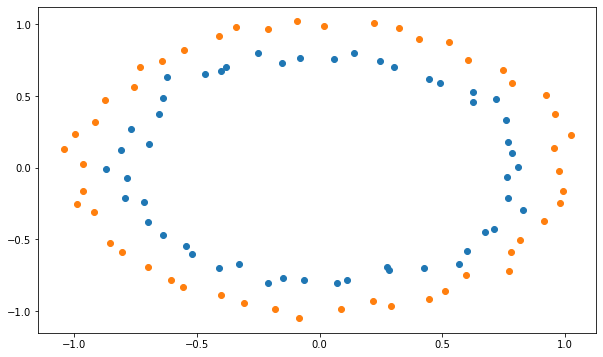

In [2]:
from sklearn.datasets import make_circles

N = 100
d = 2
X, t = make_circles(n_samples=N, noise = 0.03, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==0, 0], X[t==0, 1])
plt.show()

In [3]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=.2, random_state=42)

In [4]:
class MLP:
    
    def __init__(self, d, K, activation_function, max_val, eta):
        
        self.d = d
        self.K = K
        self.activation_function = activation_function
        self.eta = eta
        
        self.W1  = rng.uniform(-max_val, max_val, (K, d)) 
        self.b1  = rng.uniform(-max_val, max_val, (K, 1))
    
        self.W2 = rng.uniform(-max_val, max_val, (1, K)) 
        self.b2 = rng.uniform(-max_val, max_val, (1, 1))
        
    def feedforward(self, x):
    
        # Make sure x has 2 rows
        x = np.array(x).reshape((self.d, -1))

        # Hidden layer
        self.h = self.activation_function(np.dot(self.W1, x) + self.b1)

        # Output layer
        self.y = logistic(np.dot(self.W2, self.h) + self.b2) 
        
    
    def train(self, X_train, t_train, nb_epochs, visualize=True):
        errors = []
        
        for epoch in range(nb_epochs):
            
            nb_errors = 0

            # Epoch
            for i in range(X_train.shape[0]):

                # Feedforward pass: sets self.h and self.y
                self.feedforward(X_train[i, :])
        
                # Backpropagation
                self.backprop(X_train[i, :], t_train[i])
        
                # Predict the class:         
                if self.y[0, 0] > 0.5:
                    c = 1
                else:
                    c = 0

                # Count the number of misclassifications
                if t_train[i] != c: 
                    nb_errors += 1
            
            # Compute the error rate
            errors.append(nb_errors/X_train.shape[0])
                
            # Plot the decision function every 10 epochs
            if epoch % 10 == 0 and visualize:
                self.plot_classification() 

            # Stop when the error rate is 0
            if nb_errors == 0:
                if visualize:
                    self.plot_classification() 
                break
                
        return errors, epoch+1

    def backprop(self, x, t):
    
        # Make sure x has 2 rows
        x = np.array(x).reshape((self.d, -1))

        # TODO: implement backpropagation
    
    def test(self, X_test, t_test):
    
        nb_errors = 0
        for i in range(X_test.shape[0]):

            # Feedforward pass
            self.feedforward(X_test[i, :]) 

            # Predict the class:         
            if self.y[0, 0] > 0.5:
                c = 1
            else:
                c = 0

            # Count the number of misclassifications
            if t_test[i] != c: 
                nb_errors += 1

        return nb_errors/X_test.shape[0]
        
    def plot_classification(self):

        # Allow redrawing 
        clear_output(wait=True)

        x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
        y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

        x1 = xx.ravel()
        x2 = yy.ravel()    
        x = np.array([[x1[i], x2[i]] for i in range(x1.shape[0])])

        self.feedforward(x.T)
        Z = self.y.copy()
        Z[Z>0.5] = 1
        Z[Z<=0.5] = 0

        from matplotlib.colors import ListedColormap
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])

        fig = plt.figure(figsize=(10, 6))
        plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=cm_bright, alpha=.4)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=t_train, cmap=cm_bright, edgecolors='k')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=t_test, cmap=cm_bright, alpha=0.4, edgecolors='k')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()    

In [5]:
mlp = MLP(d=2, K=15, activation_function=logistic, max_val=1.0, eta=0.05)

In [6]:
# Parameters
K = 15
max_val = 1.0
eta = 0.05

# Create the MLP
mlp = MLP(d, K, logistic, max_val, eta)

print(mlp.W1)
print(mlp.b1)
print(mlp.W2)
print(mlp.b2)

[[ 0.38068004 -0.43703245]
 [-0.71050797 -0.82224028]
 [-0.51262147  0.44277693]
 [-0.29423585  0.60858971]
 [ 0.19926731 -0.67693149]
 [ 0.39720739  0.6345403 ]
 [ 0.51695254  0.30796803]
 [ 0.81075399  0.84119551]
 [-0.76953032  0.00352486]
 [ 0.75308435 -0.36099085]
 [ 0.45604752  0.79919703]
 [-0.9334666   0.5045991 ]
 [ 0.6369586   0.49357004]
 [ 0.73834869 -0.58817269]
 [ 0.07416094 -0.12087547]]
[[ 0.01397739]
 [ 0.86771315]
 [ 0.7736274 ]
 [ 0.47205804]
 [-0.52813344]
 [ 0.11926988]
 [ 0.748614  ]
 [ 0.27021531]
 [ 0.59273759]
 [ 0.93712037]
 [ 0.2036439 ]
 [ 0.54159251]
 [ 0.81351658]
 [ 0.46655608]
 [ 0.70512137]]
[[ 0.47353412 -0.18599263 -0.15883577  0.19797341 -0.54307782 -0.34722156
  -0.96098624  0.89646406  0.97363151 -0.85521485  0.28700722  0.10843798
  -0.60867749 -0.34490615 -0.2840755 ]]
[[-0.58726946]]


In [7]:
x = np.array([0.5, 0.5])

mlp.feedforward(x)

print(mlp.h)
print(mlp.y)

if mlp.y[0, 0] > 0.5:
    print("positive class")
else:
    print("negative class")

[[0.49645036]
 [0.5253131 ]
 [0.67671264]
 [0.65231597]
 [0.31713589]
 [0.65365487]
 [0.76152786]
 [0.74954556]
 [0.55224235]
 [0.75642291]
 [0.69662259]
 [0.5810679 ]
 [0.79879514]
 [0.63219479]
 [0.66413231]]
[[0.16431032]]
negative class


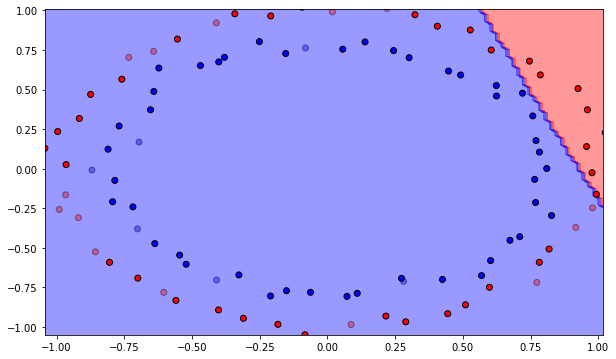

In [8]:
mlp = MLP(d, K, logistic, max_val, eta)
mlp.plot_classification() 

In [9]:
x = np.array([0.1, 0.9])

mlp.feedforward(x)

print(mlp.h)
print(mlp.y)

if mlp.y[0, 0] > 0.5:
    print("positive class")
else:
    print("negative class")

[[0.30594396]
 [0.82555576]
 [0.52276167]
 [0.61286313]
 [0.64109215]
 [0.51285156]
 [0.35360439]
 [0.27198004]
 [0.67680397]
 [0.45165817]
 [0.33919515]
 [0.27369238]
 [0.66150203]
 [0.26229712]
 [0.45231416]]
[[0.55879948]]
positive class


In [10]:
class TrainableMLP (MLP):

    def backprop(self, x, t):
    
        # Make sure x has 2 rows
        x = np.array(x).reshape((self.d, -1))

        # Output error
        delta = (t - self.y) 

        # Hidden error
        delta_hidden =  np.dot(self.W2.T, delta) * self.h * (1. - self.h)
        
        # Learn the output weights
        self.W2 += self.eta * delta * self.h.T

        # Learn the output bias
        self.b2 += self.eta * delta

        # Learn the hidden weights
        self.W1 += self.eta * np.outer(delta_hidden, x)

        # Learn the hidden biases
        self.b1 += self.eta * delta_hidden
        

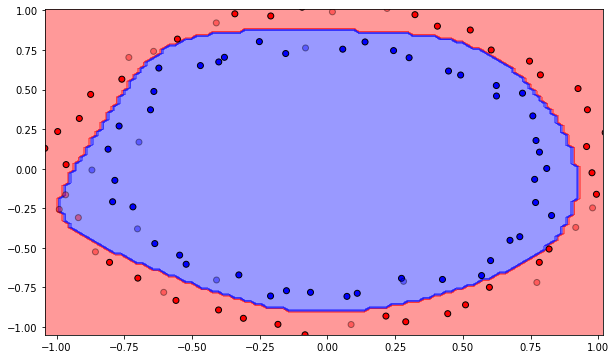

Number of epochs needed: 358
Training accuracy: 1.0


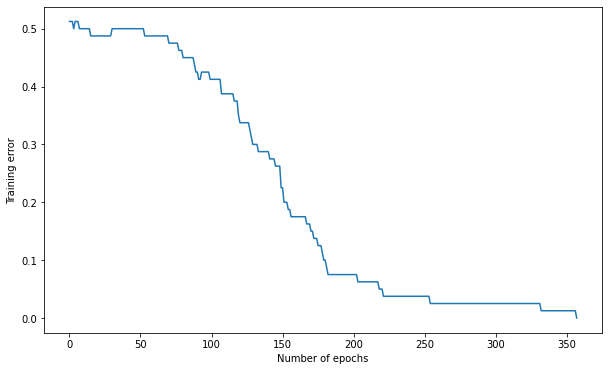

In [11]:
K = 15
max_val = 1.0
eta = 0.05

# Create the MLP
mlp = TrainableMLP(d, K, logistic, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

In [12]:
test_error = mlp.test(X_test, t_test)

print('Test accuracy:', 1. - test_error)

Test accuracy: 0.9


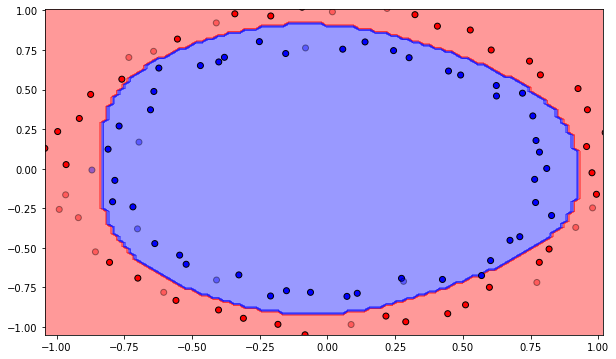

Number of epochs needed: 2000
Training accuracy: 0.9875
Test accuracy: 0.95


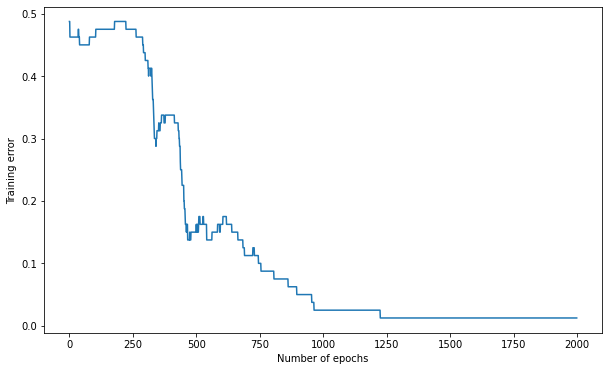

In [13]:
K = 3
max_val = 1.0
eta = 0.05

# Create the MLP
mlp = TrainableMLP(d, K, logistic, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 2000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

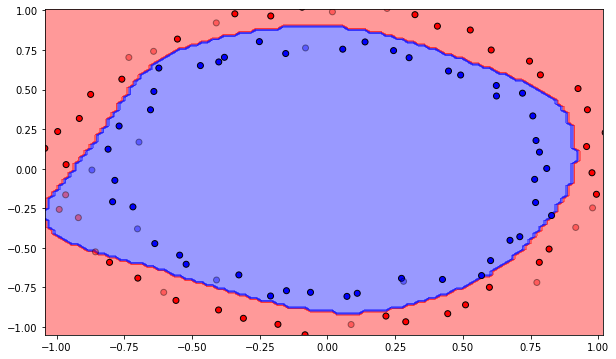

Number of epochs needed: 889
Training accuracy: 1.0
Test accuracy: 0.85


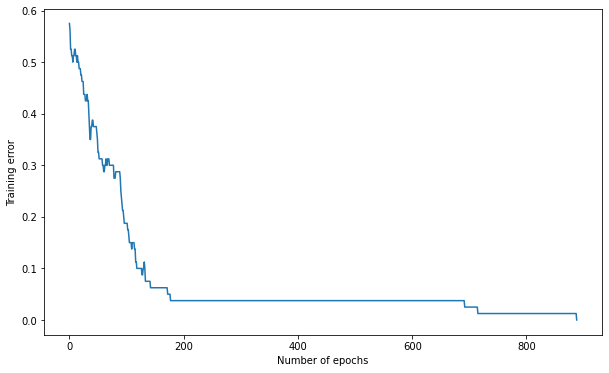

In [14]:
K = 15
max_val = 1.0
eta = 0.2

# Create the MLP
mlp = TrainableMLP(d, K, logistic, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

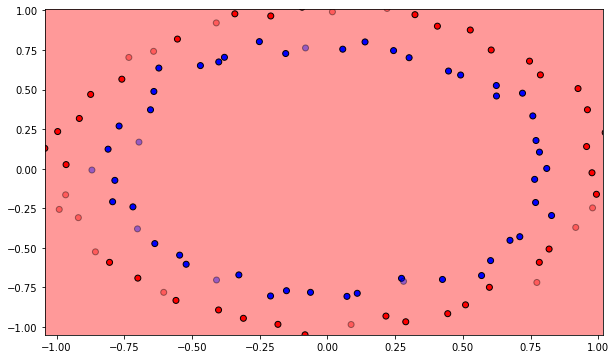

Number of epochs needed: 1000
Training accuracy: 0.525
Test accuracy: 0.30000000000000004


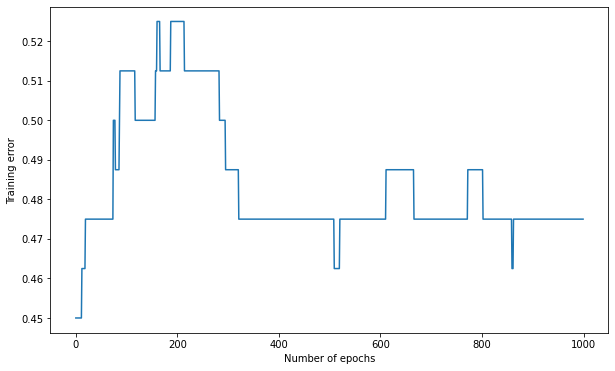

In [15]:
K = 15
max_val = 0.0
eta = 0.1

# Create the MLP
mlp = TrainableMLP(d, K, logistic, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

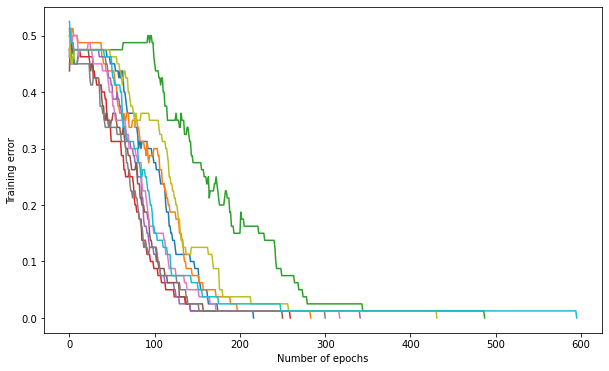

In [18]:
K = 15
max_val = 1.0
eta = 0.1

plt.figure(figsize=(10, 6))

for trial in range(10):
    # Create the MLP
    mlp = TrainableMLP(d, K, logistic, max_val, eta)

    # Train the MLP
    training_error, nb_epochs = mlp.train(X_train, t_train, 1000, visualize=False)

    plt.plot(training_error)

plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

In [19]:
# Linear transfer function
def linear(x):
    return x

# tanh transfer function 
def tanh(x):
    return np.tanh(x)

# ReLU transfer function
def relu(x):
    x = x.copy()
    x[x < 0.] = 0.
    return x

In [20]:
class TrainableMLP (MLP):

    def backprop(self, x, t):
    
        # Make sure x has 2 rows
        x = np.array(x).reshape((self.d, -1))

        # Output error
        delta = (t - self.y) 
        
        # Derivative of the transfer function
        if self.activation_function == linear:
            diff = 1.0
        elif self.activation_function == logistic:
            diff = self.h * (1. - self.h)
        elif self.activation_function == tanh:
            diff = 1. - self.h * self.h
        elif self.activation_function == relu:
            diff = self.h.copy()
            diff[diff <= 0] = 0
            diff[diff > 0] = 1
    
        # Hidden error
        delta_hidden =  np.dot(self.W2.T, delta) * diff
        
        # Learn the output weights
        self.W2 += self.eta * delta * self.h.T

        # Learn the output bias
        self.b2 += self.eta * delta

        # Learn the hidden weights
        self.W1 += self.eta * np.outer(delta_hidden, x)

        # Learn the hidden biases
        self.b1 += self.eta * delta_hidden
        

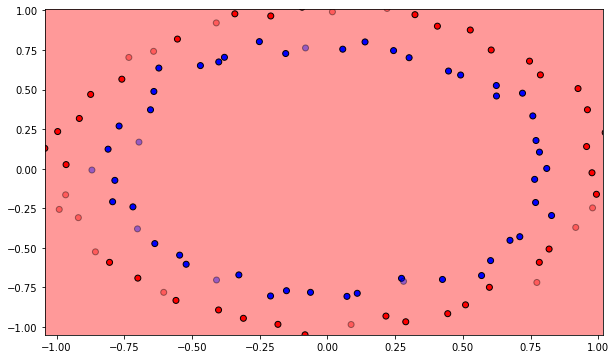

Number of epochs needed: 1000
Training accuracy: 0.5125
Test accuracy: 0.30000000000000004


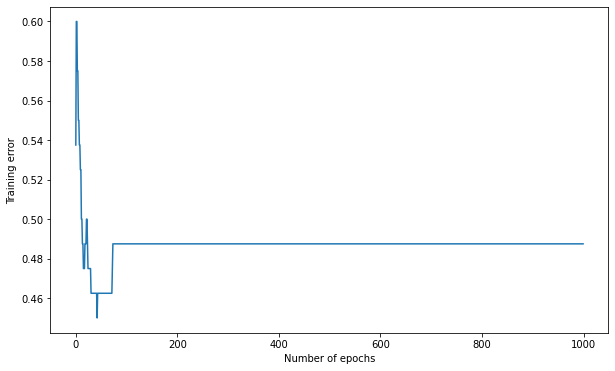

In [21]:
K = 15
max_val = 1.0
eta = 0.1
activation_function=linear

# Create the MLP
mlp = TrainableMLP(d, K, activation_function, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

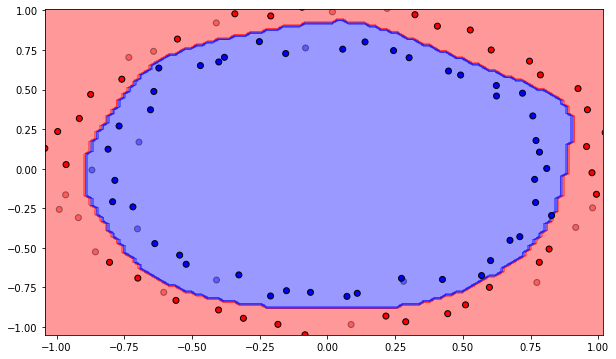

Number of epochs needed: 227
Training accuracy: 1.0
Test accuracy: 1.0


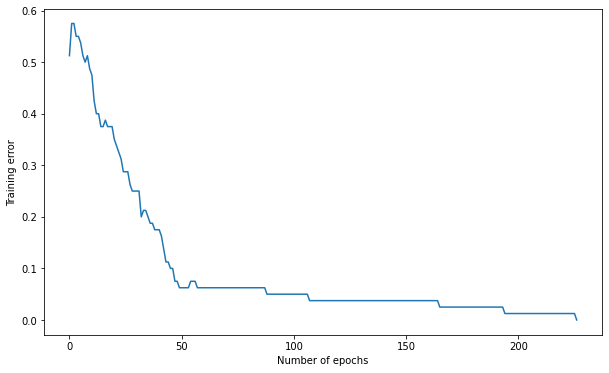

In [22]:
K = 15
max_val = 1.0
eta = 0.1
activation_function=tanh

# Create the MLP
mlp = TrainableMLP(d, K, activation_function, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

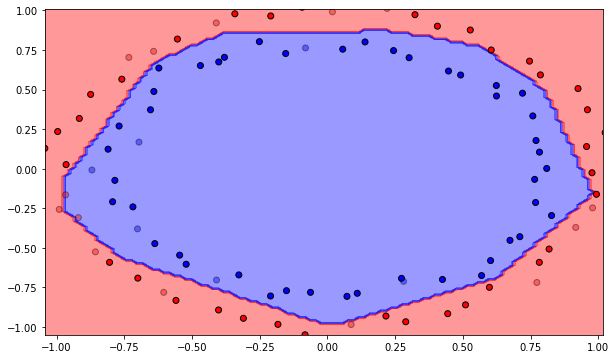

Number of epochs needed: 387
Training accuracy: 1.0
Test accuracy: 0.9


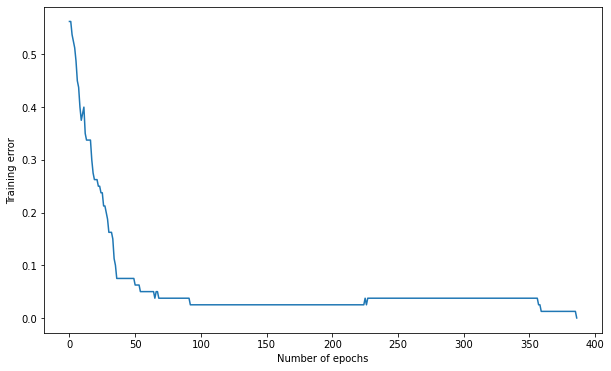

In [23]:
K = 15
max_val = 1.0
eta = 0.1
activation_function=relu

# Create the MLP
mlp = TrainableMLP(d, K, activation_function, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

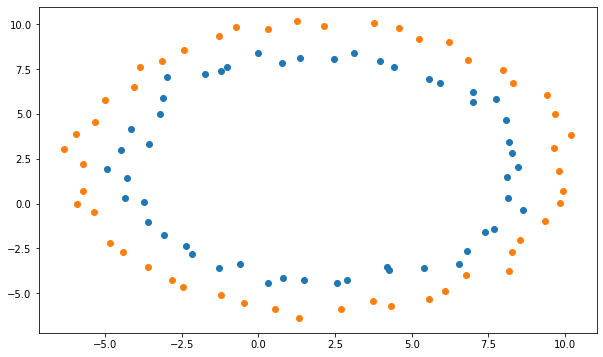

In [24]:
X_shifted = 8* X + 2 

plt.figure(figsize=(10, 6))
plt.scatter(X_shifted[t==1, 0], X_shifted[t==1, 1])
plt.scatter(X_shifted[t==0, 0], X_shifted[t==0, 1])
plt.show()

X_train, X_test, t_train, t_test = train_test_split(X_shifted, t, test_size=.3, random_state=42)

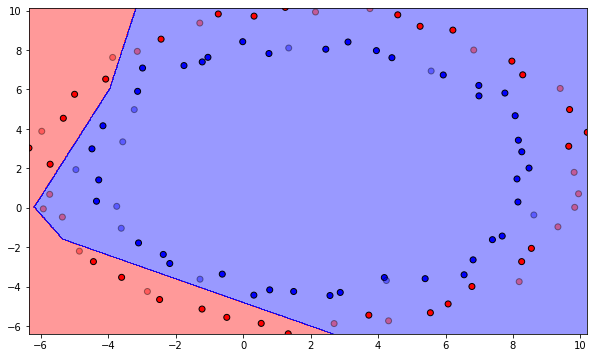

Number of epochs needed: 1000
Training accuracy: 0.7428571428571429
Test accuracy: 0.4666666666666667


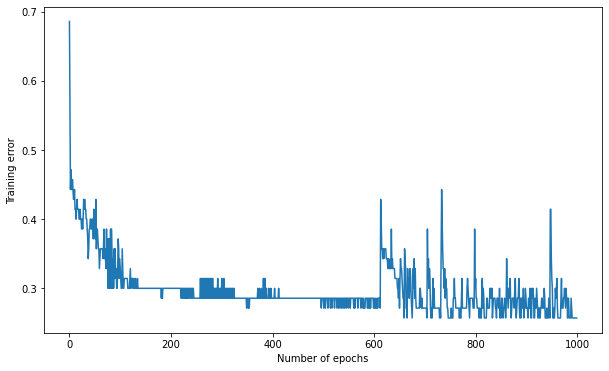

In [25]:
K = 15
max_val = 1.0
eta = 0.1
activation_function=relu

# Create the MLP
mlp = TrainableMLP(d, K, activation_function, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

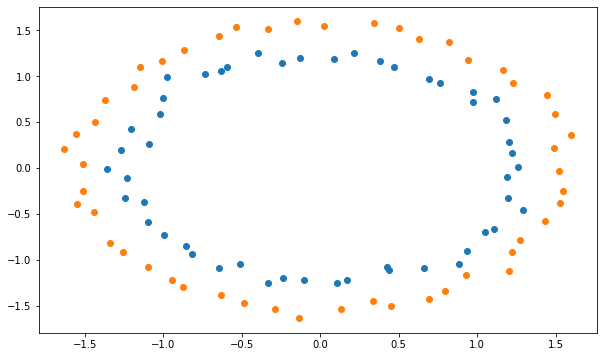

In [26]:
X_scaled = (X_shifted - X_shifted.mean(axis=0))/(X_shifted.std(axis=0)) 

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[t==1, 0], X_scaled[t==1, 1])
plt.scatter(X_scaled[t==0, 0], X_scaled[t==0, 1])
plt.show()

X_train, X_test, t_train, t_test = train_test_split(X_scaled, t, test_size=.3, random_state=42)

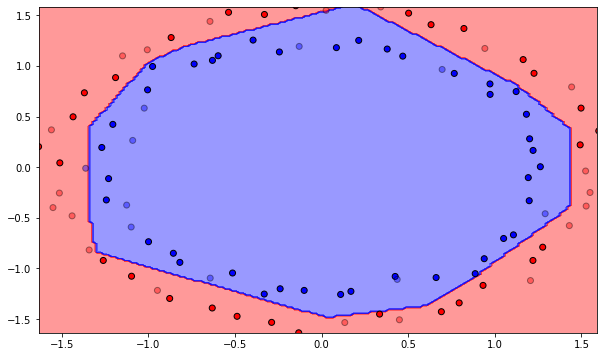

Number of epochs needed: 438
Training accuracy: 1.0
Test accuracy: 0.9666666666666667


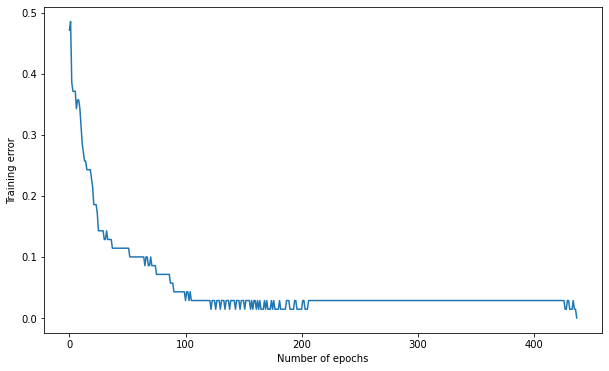

In [27]:
K = 15
max_val = 1.0
eta = 0.1
activation_function=relu

# Create the MLP
mlp = TrainableMLP(d, K, activation_function, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

In [28]:
class StochasticMLP (TrainableMLP):
        
    
    def train(self, X_train, t_train, nb_epochs, visualize=True):
        errors = []
        
        for epoch in range(nb_epochs):
            
            nb_errors = 0

            # Epoch
            for i in rng.permutation(X_train.shape[0]):

                # Feedforward pass: sets self.h and self.y
                self.feedforward(X_train[i, :])
        
                # Backpropagation
                self.backprop(X_train[i, :], t_train[i])
        
                # Predict the class:         
                if self.y[0, 0] > 0.5:
                    c = 1
                else:
                    c = 0

                # Count the number of misclassifications
                if t_train[i] != c: 
                    nb_errors += 1
            
            # Compute the error rate
            errors.append(nb_errors/X_train.shape[0])
                
            # Plot the decision function every 10 epochs
            if epoch % 10 == 0 and visualize:
                self.plot_classification() 

            # Stop when the error rate is 0
            if nb_errors == 0:
                if visualize:
                    self.plot_classification() 
                break
                
        return errors, epoch

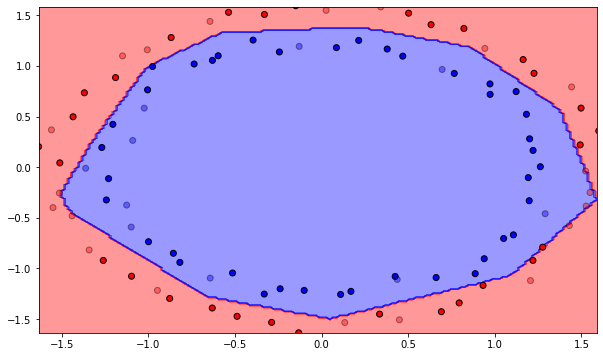

Number of epochs needed: 80
Training accuracy: 1.0
Test accuracy: 0.9333333333333333


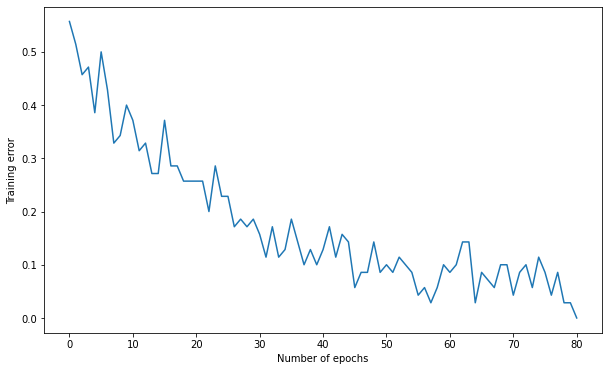

In [30]:
K = 15
max_val = 1.0
eta = 0.1
activation_function=relu

# Create the MLP
mlp = StochasticMLP(d, K, activation_function, max_val, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

In [31]:
class GlorotMLP (StochasticMLP):

    def __init__(self, d, K, activation_function, eta):
        
        self.d = d
        self.K = K
        self.activation_function = activation_function
        self.eta = eta
        
        max_val = np.sqrt(6./(d+K))
        self.W1  = rng.uniform(-max_val, max_val, (K, d)) 
        self.b1  = np.zeros((K, 1))
    
        max_val = np.sqrt(6./(K+1))
        self.W2 = rng.uniform(-max_val, max_val, (1, K)) 
        self.b2 = np.zeros((1, 1))

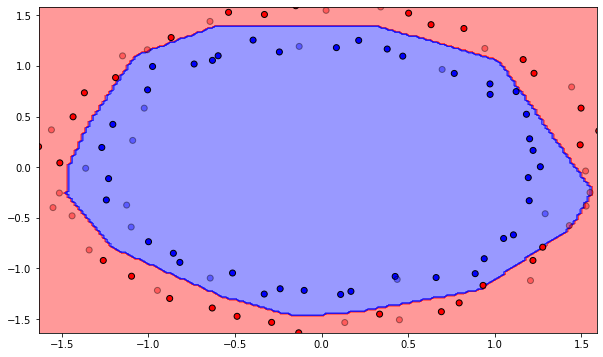

Number of epochs needed: 81
Training accuracy: 1.0
Test accuracy: 0.9333333333333333


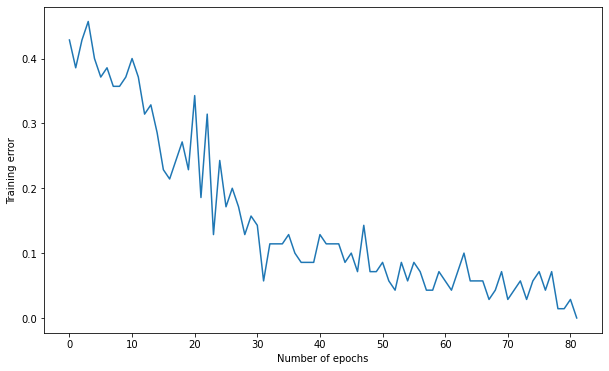

In [32]:
K = 15
eta = 0.1
activation_function=relu

# Create the MLP
mlp = GlorotMLP(d, K, activation_function, eta)

# Train the MLP
training_error, nb_epochs = mlp.train(X_train, t_train, 1000)

# Test the MLP
test_error = mlp.test(X_test, t_test)

print('Number of epochs needed:', nb_epochs)
print('Training accuracy:', 1. - training_error[-1])
print('Test accuracy:', 1. - test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_error)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.show()

In [33]:
activation_function = relu

def run(K, eta):
    # Create the MLP
    mlp = GlorotMLP(d, K, activation_function, eta)

    # Train the MLP
    training_error, nb_epochs = mlp.train(X_train, t_train, 1000, visualize=False)

    # Test the MLP
    test_error = mlp.test(X_test, t_test)

    print('K:', K, 'eta:', eta)
    print('Number of epochs needed:', nb_epochs)
    print('Training accuracy:', 1. - training_error[-1])
    print('Test accuracy:', 1. - test_error)
    print('-'*20)

for K in [10, 15, 20, 25]:
    for eta in [0.01, 0.05, 0.1, 0.2, 0.3]:
        run(K, eta)

K: 10 eta: 0.01
Number of epochs needed: 390
Training accuracy: 1.0
Test accuracy: 0.9
--------------------
K: 10 eta: 0.05
Number of epochs needed: 106
Training accuracy: 1.0
Test accuracy: 0.9666666666666667
--------------------
K: 10 eta: 0.1
Number of epochs needed: 54
Training accuracy: 1.0
Test accuracy: 0.9333333333333333
--------------------
K: 10 eta: 0.2
Number of epochs needed: 54
Training accuracy: 1.0
Test accuracy: 0.9
--------------------
K: 10 eta: 0.3
Number of epochs needed: 73
Training accuracy: 1.0
Test accuracy: 1.0
--------------------
K: 15 eta: 0.01
Number of epochs needed: 240
Training accuracy: 1.0
Test accuracy: 0.8666666666666667
--------------------
K: 15 eta: 0.05
Number of epochs needed: 97
Training accuracy: 1.0
Test accuracy: 0.9
--------------------
K: 15 eta: 0.1
Number of epochs needed: 76
Training accuracy: 1.0
Test accuracy: 1.0
--------------------
K: 15 eta: 0.2
Number of epochs needed: 56
Training accuracy: 1.0
Test accuracy: 0.9666666666666667
